Goal:
you are given a dataset of popular songs on Spotify, which contains artists and music names with all audio characteristics of each music. Your goal is to group music genres based on similarities in their audio characteristics.

In [98]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd

In [99]:
data = pd.read_csv("Spotify.csv")
data.head()


Index                   Title             Artist            Top Genre  \
0      1                 Sunrise        Norah Jones      adult standards   
1      2             Black Night        Deep Purple           album rock   
2      3          Clint Eastwood           Gorillaz  alternative hip hop   
3      4           The Pretender       Foo Fighters    alternative metal   
4      5  Waitin' On A Sunny Day  Bruce Springsteen         classic rock   

   Year  Beats Per Minute (BPM)  Energy  Danceability  Loudness (dB)  \
0  2004                     157      30            53            -14   
1  2000                     135      79            50            -11   
2  2001                     168      69            66             -9   
3  2007                     173      96            43             -4   
4  2002                     106      82            58             -5   

   Liveness  Valence Length (Duration)  Acousticness  Speechiness  Popularity  
0        11       68               201            94            3          71  
1        17       81               207            17            7          39  
2         7       52               341             2           17          69  
3         3       37               269             0            4          76  
4        10       87               256             1            3          59

In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Index                   1994 non-null   int64 
 1   Title                   1994 non-null   object
 2   Artist                  1994 non-null   object
 3   Top Genre               1994 non-null   object
 4   Year                    1994 non-null   int64 
 5   Beats Per Minute (BPM)  1994 non-null   int64 
 6   Energy                  1994 non-null   int64 
 7   Danceability            1994 non-null   int64 
 8   Loudness (dB)           1994 non-null   int64 
 9   Liveness                1994 non-null   int64 
 10  Valence                 1994 non-null   int64 
 11  Length (Duration)       1994 non-null   object
 12  Acousticness            1994 non-null   int64 
 13  Speechiness             1994 non-null   int64 
 14  Popularity              1994 non-null   int64 
dtypes: i

In [101]:
data.describe()

Index         Year  Beats Per Minute (BPM)       Energy  \
count  1994.000000  1994.000000             1994.000000  1994.000000   
mean    997.500000  1992.992979              120.215647    59.679539   
std     575.762538    16.116048               28.028096    22.154322   
min       1.000000  1956.000000               37.000000     3.000000   
25%     499.250000  1979.000000               99.000000    42.000000   
50%     997.500000  1993.000000              119.000000    61.000000   
75%    1495.750000  2007.000000              136.000000    78.000000   
max    1994.000000  2019.000000              206.000000   100.000000   

       Danceability  Loudness (dB)     Liveness      Valence  Acousticness  \
count   1994.000000    1994.000000  1994.000000  1994.000000   1994.000000   
mean      53.238215      -9.008526    19.012036    49.408726     28.858074   
std       15.351507       3.647876    16.727378    24.858212     29.011986   
min       10.000000     -27.000000     2.000000     3.000000      0.000000   
25%       43.000000     -11.000000     9.000000    29.000000      3.000000   
50%       53.000000      -8.000000    12.000000    47.000000     18.000000   
75%       64.000000      -6.000000    23.000000    69.750000     50.000000   
max       96.000000      -2.000000    99.000000    99.000000     99.000000   

       Speechiness  Popularity  
count  1994.000000  1994.00000  
mean      4.994985    59.52658  
std       4.401566    14.35160  
min       2.000000    11.00000  
25%       3.000000    49.25000  
50%       4.000000    62.00000  
75%       5.000000    71.00000  
max      55.000000   100.00000

In [102]:
data.columns

Index(['Index', 'Title', 'Artist', 'Top Genre', 'Year',
       'Beats Per Minute (BPM)', 'Energy', 'Danceability', 'Loudness (dB)',
       'Liveness', 'Valence', 'Length (Duration)', 'Acousticness',
       'Speechiness', 'Popularity'],
      dtype='object')

In [103]:
data.size

29910

In [104]:
data.isna().sum()

Index                     0
Title                     0
Artist                    0
Top Genre                 0
Year                      0
Beats Per Minute (BPM)    0
Energy                    0
Danceability              0
Loudness (dB)             0
Liveness                  0
Valence                   0
Length (Duration)         0
Acousticness              0
Speechiness               0
Popularity                0
dtype: int64

In [105]:
data.shape

(1994, 15)

In [106]:
print(data.head())

   Index                   Title             Artist            Top Genre  \
0      1                 Sunrise        Norah Jones      adult standards   
1      2             Black Night        Deep Purple           album rock   
2      3          Clint Eastwood           Gorillaz  alternative hip hop   
3      4           The Pretender       Foo Fighters    alternative metal   
4      5  Waitin' On A Sunny Day  Bruce Springsteen         classic rock   

   Year  Beats Per Minute (BPM)  Energy  Danceability  Loudness (dB)  \
0  2004                     157      30            53            -14   
1  2000                     135      79            50            -11   
2  2001                     168      69            66             -9   
3  2007                     173      96            43             -4   
4  2002                     106      82            58             -5   

   Liveness  Valence Length (Duration)  Acousticness  Speechiness  Popularity  
0        11       68          

Here, we will drop the index column.

In [107]:
data=data.drop('Index', axis=1)
data.head()

Title             Artist            Top Genre  Year  \
0                 Sunrise        Norah Jones      adult standards  2004   
1             Black Night        Deep Purple           album rock  2000   
2          Clint Eastwood           Gorillaz  alternative hip hop  2001   
3           The Pretender       Foo Fighters    alternative metal  2007   
4  Waitin' On A Sunny Day  Bruce Springsteen         classic rock  2002   

   Beats Per Minute (BPM)  Energy  Danceability  Loudness (dB)  Liveness  \
0                     157      30            53            -14        11   
1                     135      79            50            -11        17   
2                     168      69            66             -9         7   
3                     173      96            43             -4         3   
4                     106      82            58             -5        10   

   Valence Length (Duration)  Acousticness  Speechiness  Popularity  
0       68               201            94            3          71  
1       81               207            17            7          39  
2       52               341             2           17          69  
3       37               269             0            4          76  
4       87               256             1            3          59

In [108]:
data.corr()

Year  Beats Per Minute (BPM)    Energy  \
Year                    1.000000                0.012570  0.147235   
Beats Per Minute (BPM)  0.012570                1.000000  0.156644   
Energy                  0.147235                0.156644  1.000000   
Danceability            0.077493               -0.140602  0.139616   
Loudness (dB)           0.343764                0.092927  0.735711   
Liveness                0.019017                0.016256  0.174118   
Valence                -0.166163                0.059653  0.405175   
Acousticness           -0.132946               -0.122472 -0.665156   
Speechiness             0.054097                0.085598  0.205865   
Popularity             -0.158962               -0.003181  0.103393   

                        Danceability  Loudness (dB)  Liveness   Valence  \
Year                        0.077493       0.343764  0.019017 -0.166163   
Beats Per Minute (BPM)     -0.140602       0.092927  0.016256  0.059653   
Energy                      0.139616       0.735711  0.174118  0.405175   
Danceability                1.000000       0.044235 -0.103063  0.514564   
Loudness (dB)               0.044235       1.000000  0.098257  0.147041   
Liveness                   -0.103063       0.098257  1.000000  0.050667   
Valence                     0.514564       0.147041  0.050667  1.000000   
Acousticness               -0.135769      -0.451635 -0.046206 -0.239729   
Speechiness                 0.125229       0.125090  0.092594  0.107102   
Popularity                  0.144344       0.165527 -0.111978  0.095911   

                        Acousticness  Speechiness  Popularity  
Year                       -0.132946     0.054097   -0.158962  
Beats Per Minute (BPM)     -0.122472     0.085598   -0.003181  
Energy                     -0.665156     0.205865    0.103393  
Danceability               -0.135769     0.125229    0.144344  
Loudness (dB)              -0.451635     0.125090    0.165527  
Liveness                   -0.046206     0.092594   -0.111978  
Valence                    -0.239729     0.107102    0.095911  
Acousticness                1.000000    -0.098256   -0.087604  
Speechiness                -0.098256     1.000000    0.111689  
Popularity                 -0.087604     0.111689    1.000000

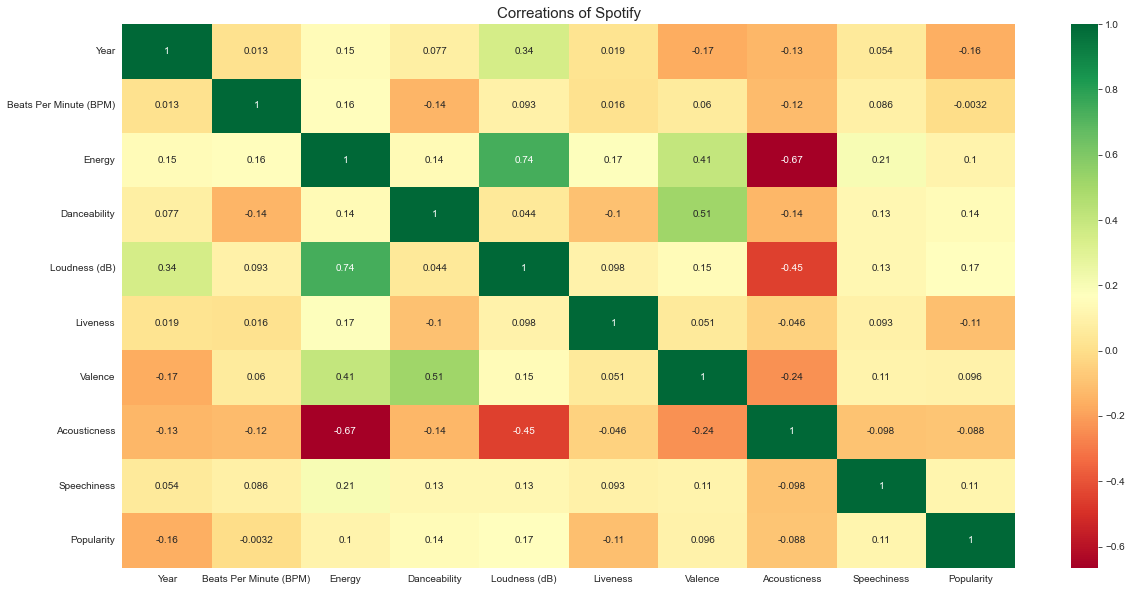

In [109]:

plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True,  cmap='RdYlGn')
title='Correations of Spotify'
plt.title(title,fontsize=15)
plt.show()


use the K-means clustering algorithm to find the similarities between all the audio features. Then add clusters in the dataset based on the similarities we found. So now create a new dataset of all the audio characteristics and perform clustering analysis using the K-means clustering algorithm:

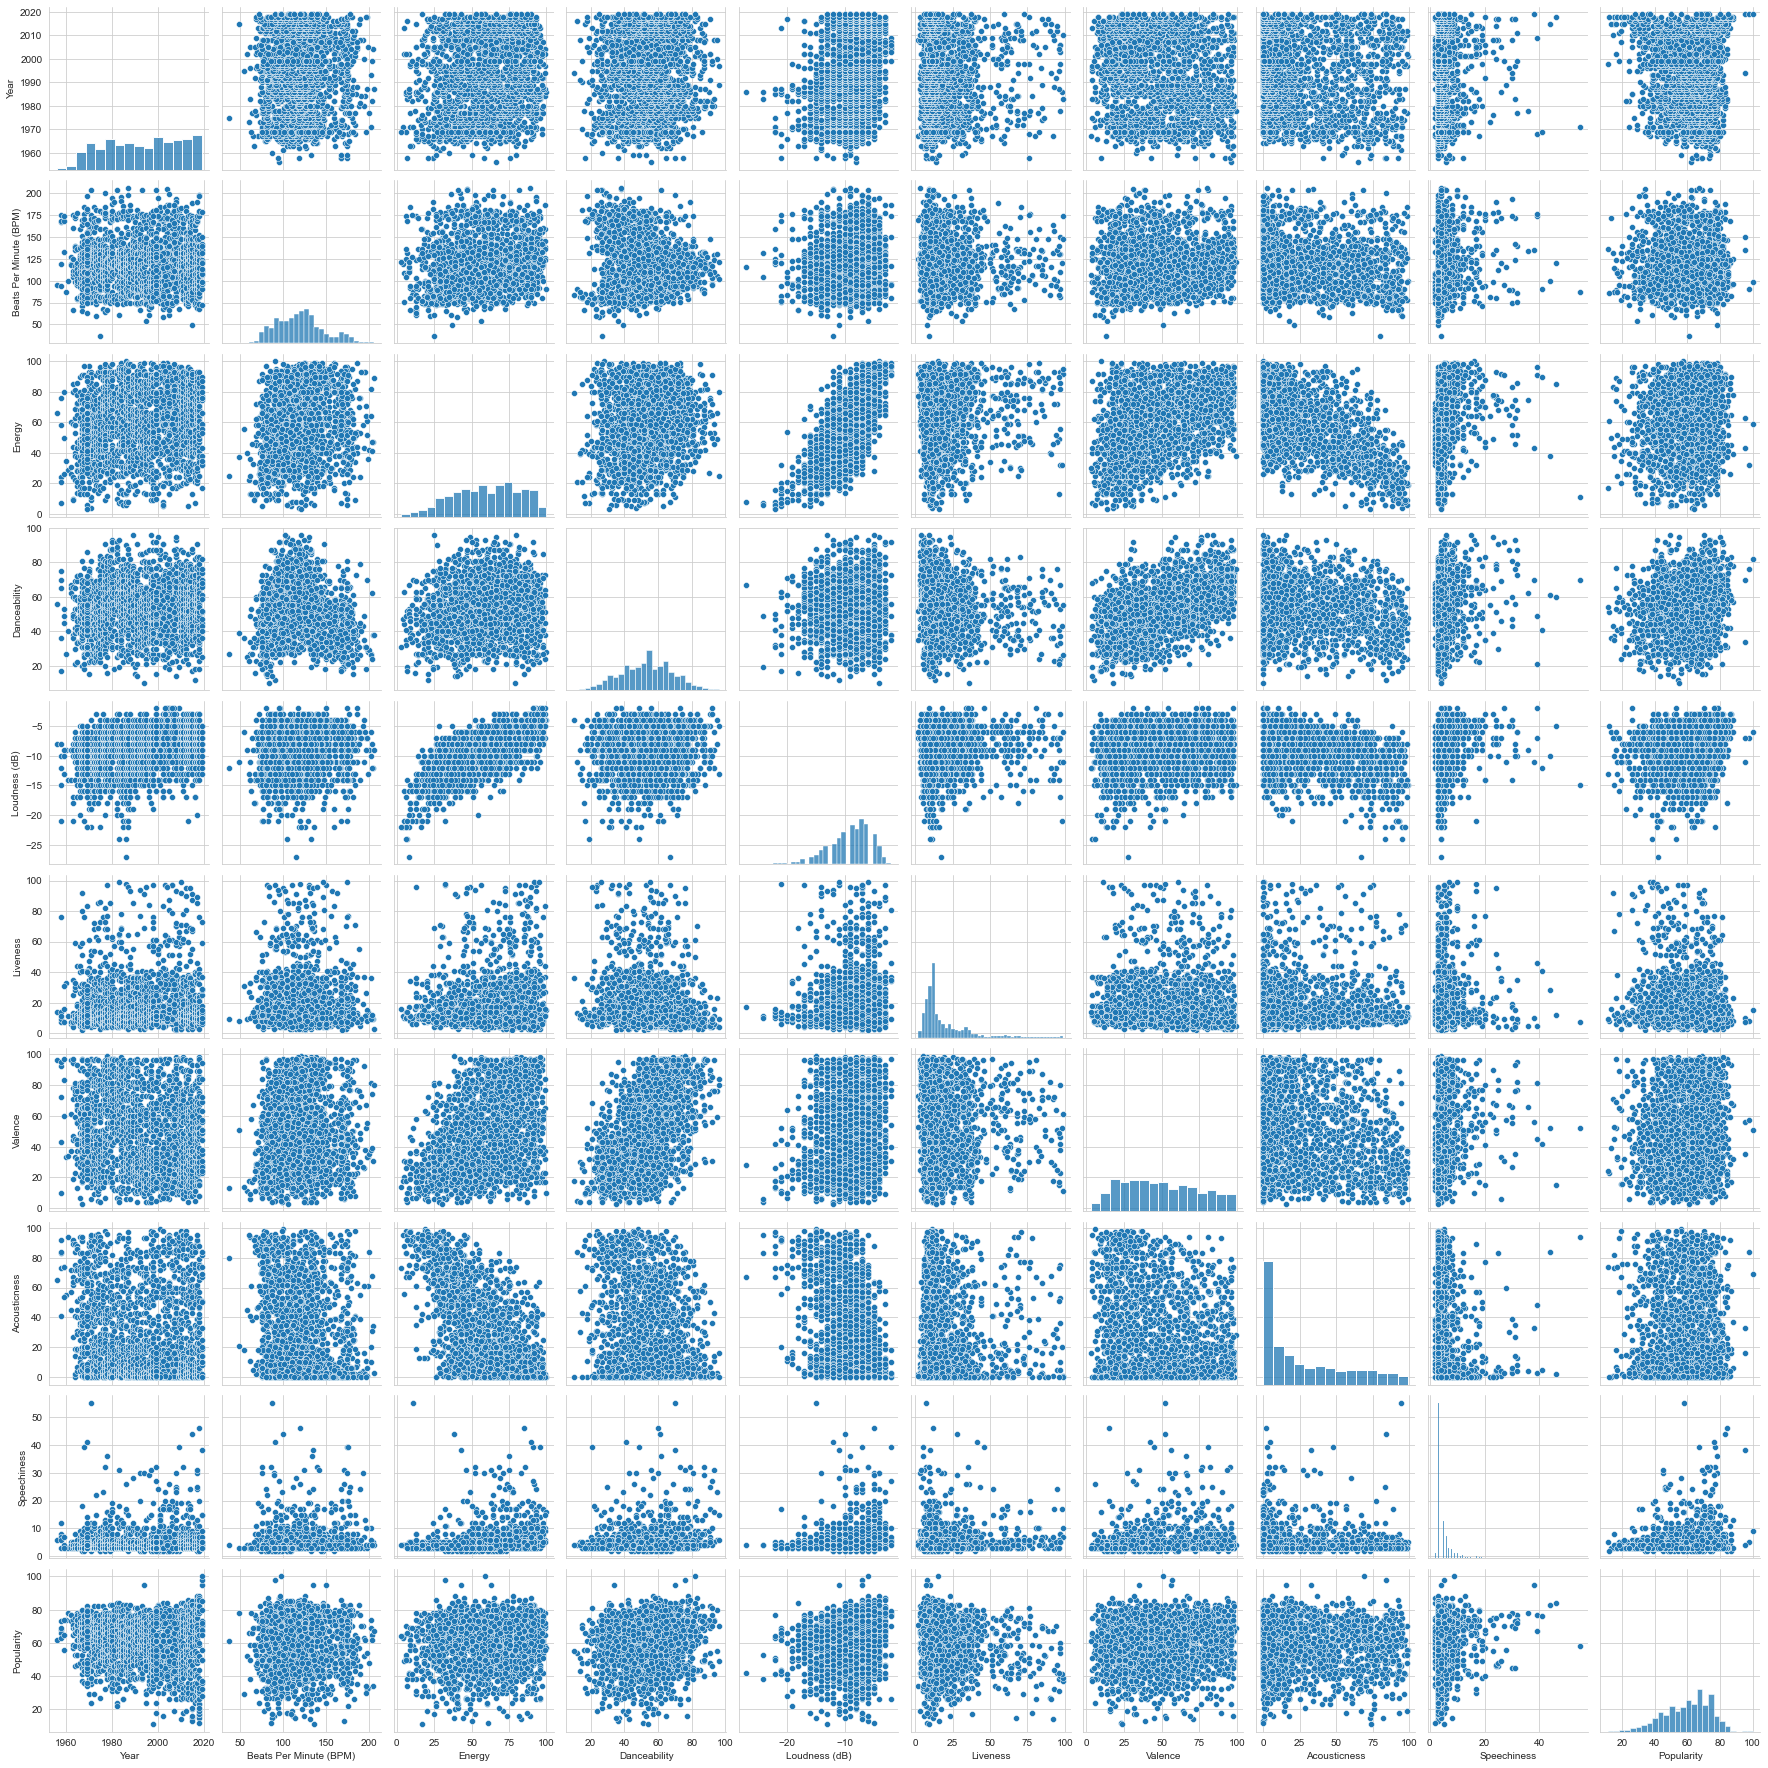

In [110]:
sns.pairplot(data)

In [111]:
import warnings
warnings.filterwarnings('ignore')

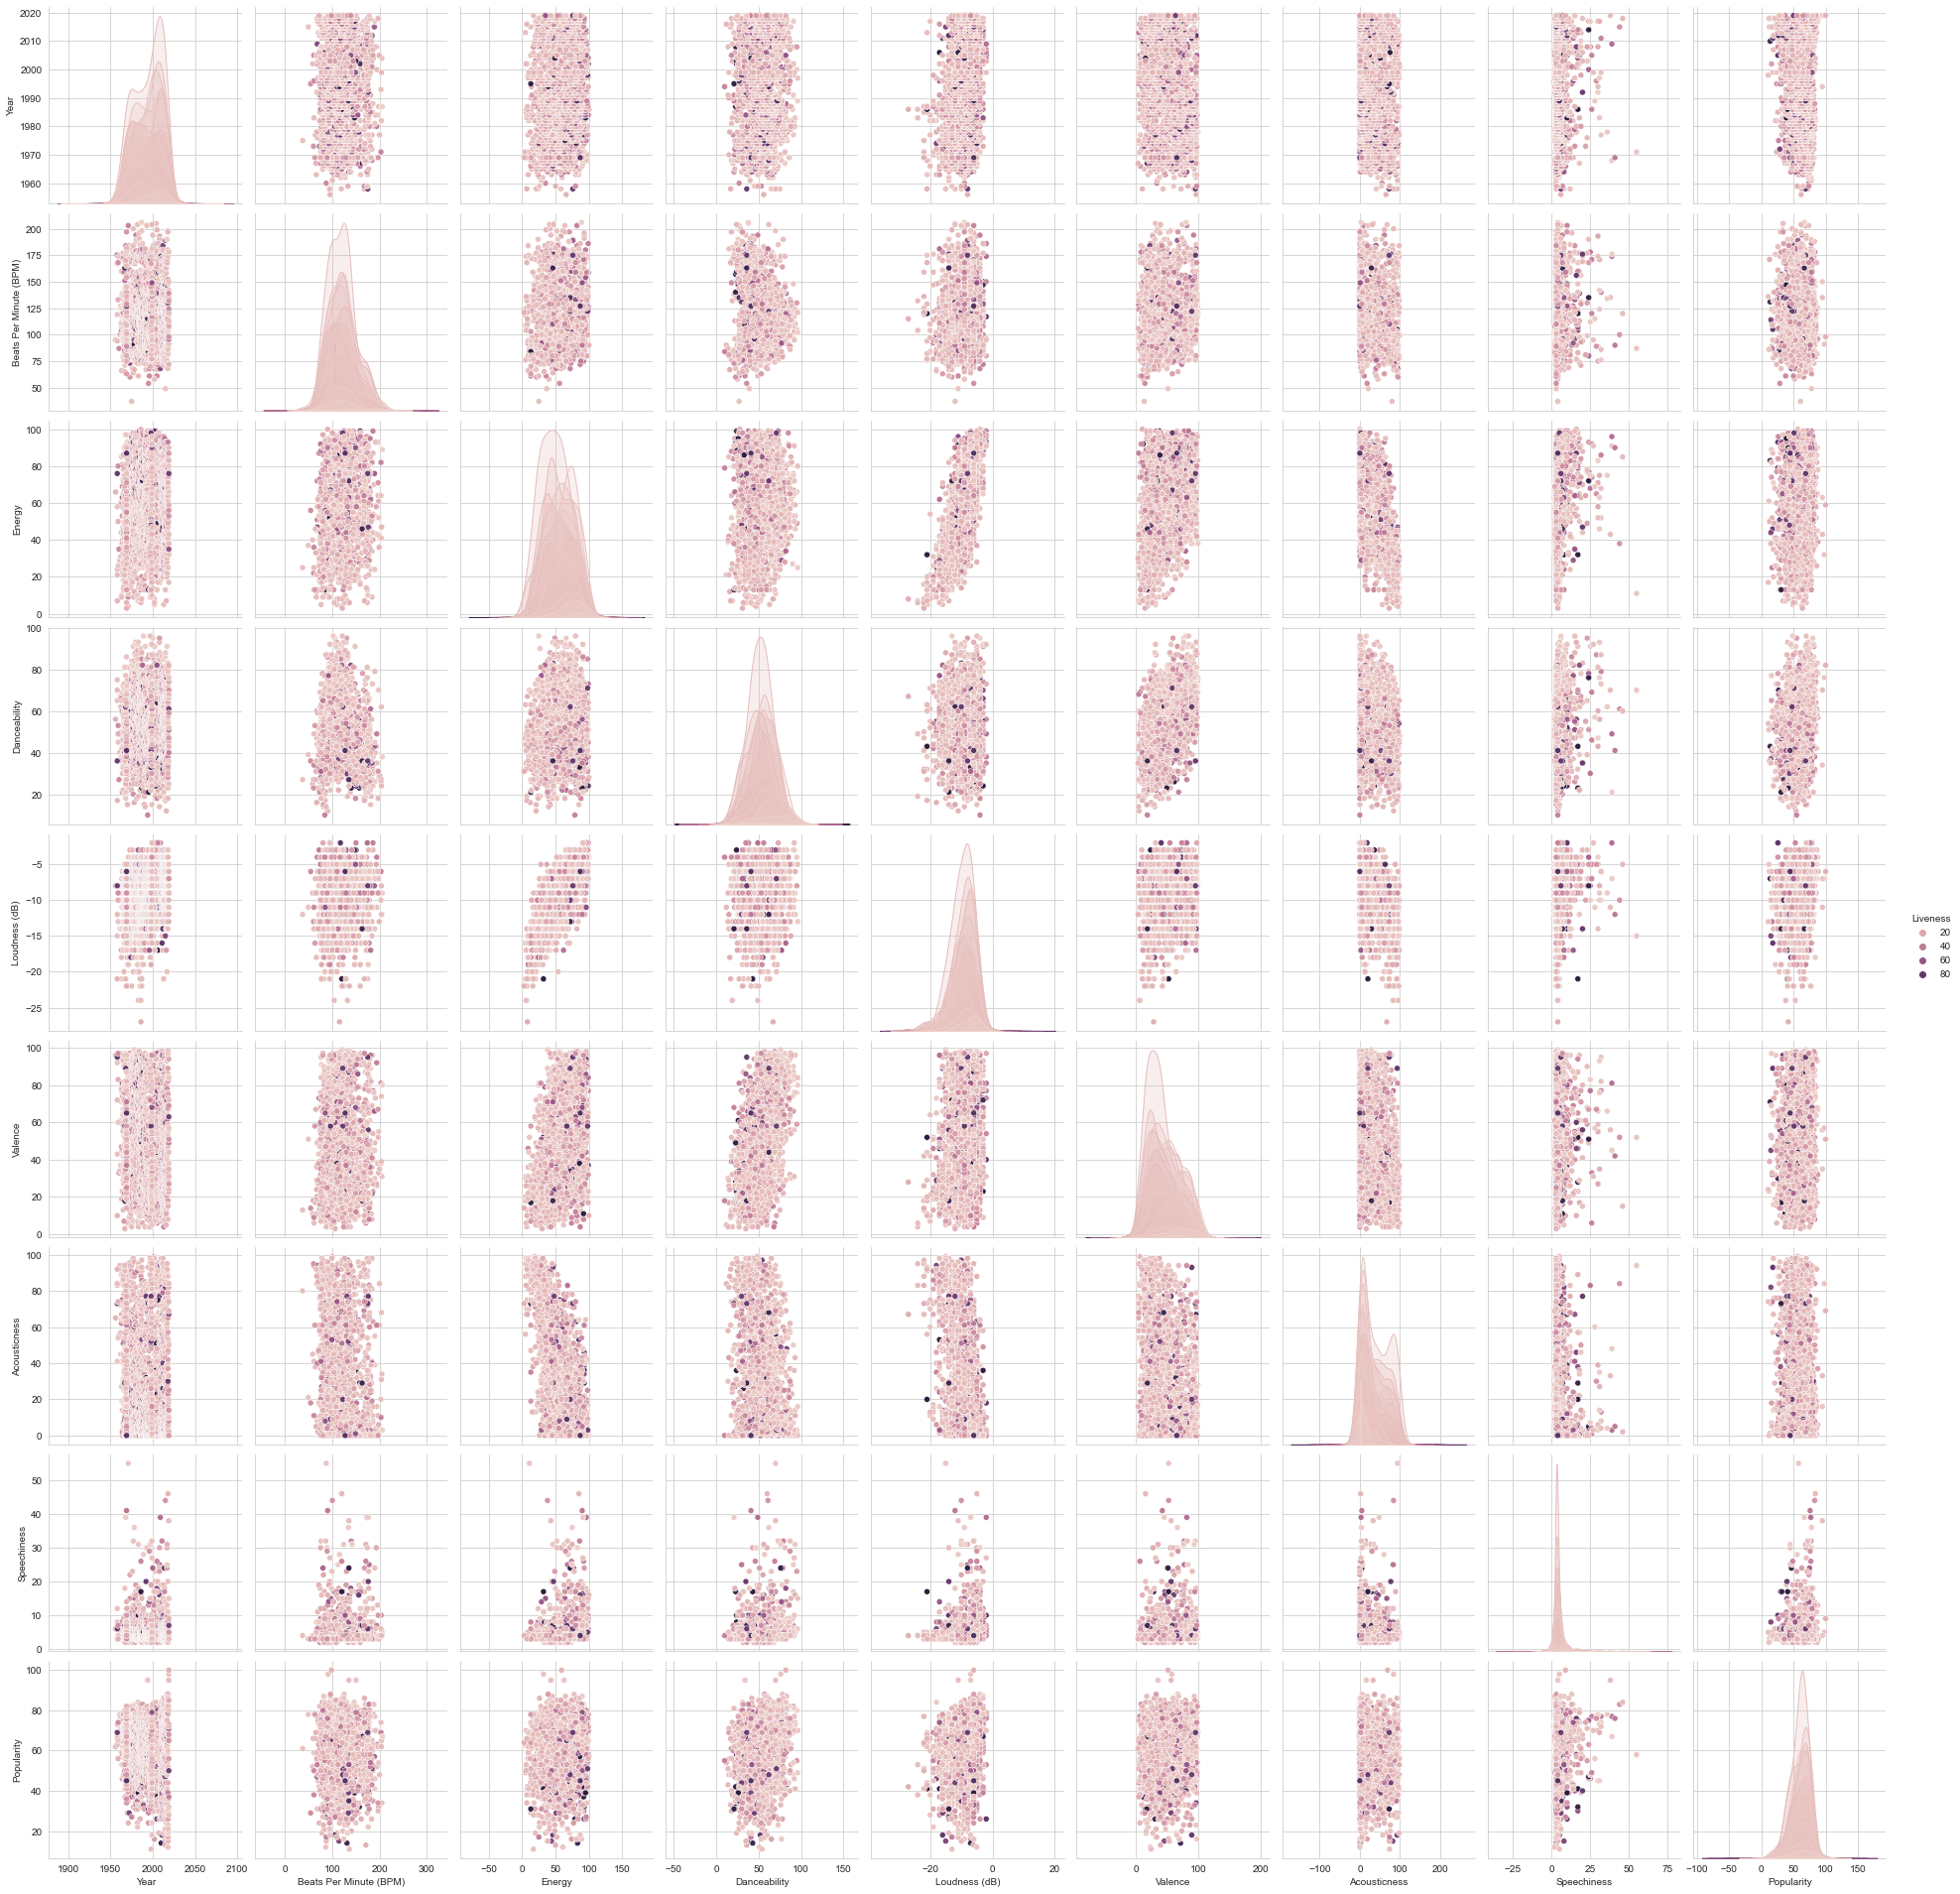

In [112]:
sns.set_style("whitegrid")
sns.pairplot(data,hue="Liveness",size=3);
plt.show()

In [113]:
data.columns

Index(['Title', 'Artist', 'Top Genre', 'Year', 'Beats Per Minute (BPM)',
       'Energy', 'Danceability', 'Loudness (dB)', 'Liveness', 'Valence',
       'Length (Duration)', 'Acousticness', 'Speechiness', 'Popularity'],
      dtype='object')

In [114]:
from sklearn import cluster
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [115]:
df=data[["Beats Per Minute (BPM)","Loudness (dB)","Liveness","Valence",
        "Acousticness","Speechiness"]]

In [119]:
for i in data.columns:
    MinMaxScaler(i)
kmeans= KMeans(n_clusters=10)
clusters=kmeans.fit_predict(df)
clusters


array([9, 5, 7, ..., 9, 9, 8])

In [120]:
data['Music']=clusters
MinMaxScaler(data['Music'])
data['Music']=data['Music'].map({1:"cluster 1",2:"cluster 2",3:" cluster 3",4:"cluster 4",5:"cluster 5",
                                6:"cluster 6",7:"cluster 7", 8:"cluster 8",
                                9:"cluster 9",10:"cluster 10"})

In [121]:
data.head()

Title             Artist            Top Genre  Year  \
0                 Sunrise        Norah Jones      adult standards  2004   
1             Black Night        Deep Purple           album rock  2000   
2          Clint Eastwood           Gorillaz  alternative hip hop  2001   
3           The Pretender       Foo Fighters    alternative metal  2007   
4  Waitin' On A Sunny Day  Bruce Springsteen         classic rock  2002   

   Beats Per Minute (BPM)  Energy  Danceability  Loudness (dB)  Liveness  \
0                     157      30            53            -14        11   
1                     135      79            50            -11        17   
2                     168      69            66             -9         7   
3                     173      96            43             -4         3   
4                     106      82            58             -5        10   

   Valence Length (Duration)  Acousticness  Speechiness  Popularity      Music  
0       68               201            94            3          71  cluster 9  
1       81               207            17            7          39  cluster 5  
2       52               341             2           17          69  cluster 7  
3       37               269             0            4          76  cluster 7  
4       87               256             1            3          59        NaN

In [129]:
import plotly.graph_objects as go
PLOT = go.Figure()
for i in list(data["Music"].unique()):
    

    PLOT.add_trace(go.Scatter3d(x = data[data["Music"]== i]['Beats Per Minute (BPM)'],
                                y = data[data["Music"] == i]['Energy'],
                                z = data[data["Music"] == i]['Danceability'],                        
                                mode = 'markers',marker_size = 6, marker_line_width = 1,
                                name = str(i)))
PLOT.update_traces(hovertemplate='Beats Per Minute (BPM): %{x} <br>Energy: %{y} <br>Danceability: %{z}')

    
PLOT.update_layout(width = 800, height = 800, autosize = True, showlegend = True,
                   scene = dict(xaxis=dict(title = 'Beats Per Minute (BPM)', titlefont_color = 'black'),
                                yaxis=dict(title = 'Energy', titlefont_color = 'black'),
                                zaxis=dict(title = 'Danceability', titlefont_color = 'black')),
                   font = dict(family = "Gilroy", color  = 'black', size=12))

  

In [128]:
import plotly.graph_objects as go
PLOT = go.Figure()
for i in list(data["Music"].unique()):
    

    PLOT.add_trace(go.Scatter3d(x = data[data["Music"]== i]['Beats Per Minute (BPM)'],
                                y = data[data["Music"] == i]['Energy'],
                                z = data[data["Music"] == i]['Danceability'],                        
                                mode = 'markers',marker_size = 5, marker_line_width = 1,
                                name = str(i)))
PLOT.update_traces(hovertemplate='Beats Per Minute (BPM): %{x} <br>Energy: %{y} <br>Danceability: %{z}')

    
PLOT.update_layout(width = 1200, height = 1200, autosize = True, showlegend = True,
                   scene = dict(xaxis=dict(title = 'Beats Per Minute (BPM)', titlefont_color = 'red'),
                                yaxis=dict(title = 'Energy', titlefont_color = 'red'),
                                zaxis=dict(title = 'Danceability', titlefont_color = 'red')),
                   font = dict(family = "Gilroy", color  = 'red', size=15))
  